In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Fixed the CSV file to replace NA with None
fifa_df = pd.read_csv(r"C:\Users\sa952592\Documents\Python Scripts\Kaggle\FIFA\data.csv")

fifa_df.shape


(18207, 89)

In [4]:
fifa_df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
#Lets check for NA values
fifa_df.isna().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [6]:
#Since Majority of 'Loaned From' ,'Release Clause '
fifa_df.drop('Loaned From',axis=1,inplace=True)
fifa_df.drop('Release Clause',axis=1,inplace=True)
fifa_df['Club'].fillna("Sofia",inplace=True) # Looking at the URL, we can guess that the name of the club is Sofia
fifa_df.fillna(fifa_df.mean,axis=1,inplace=True)

In [7]:
#fifa_df = clean_df(fifa_df)

fifa_df.shape

(18207, 86)

In [8]:
fifa_df.isna().sum()

ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club                        0
Club Logo                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LW                          0
                           ..
Volleys                     0
Dribbling                   0
Curve     

In [9]:
fifa_df.columns


Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandli

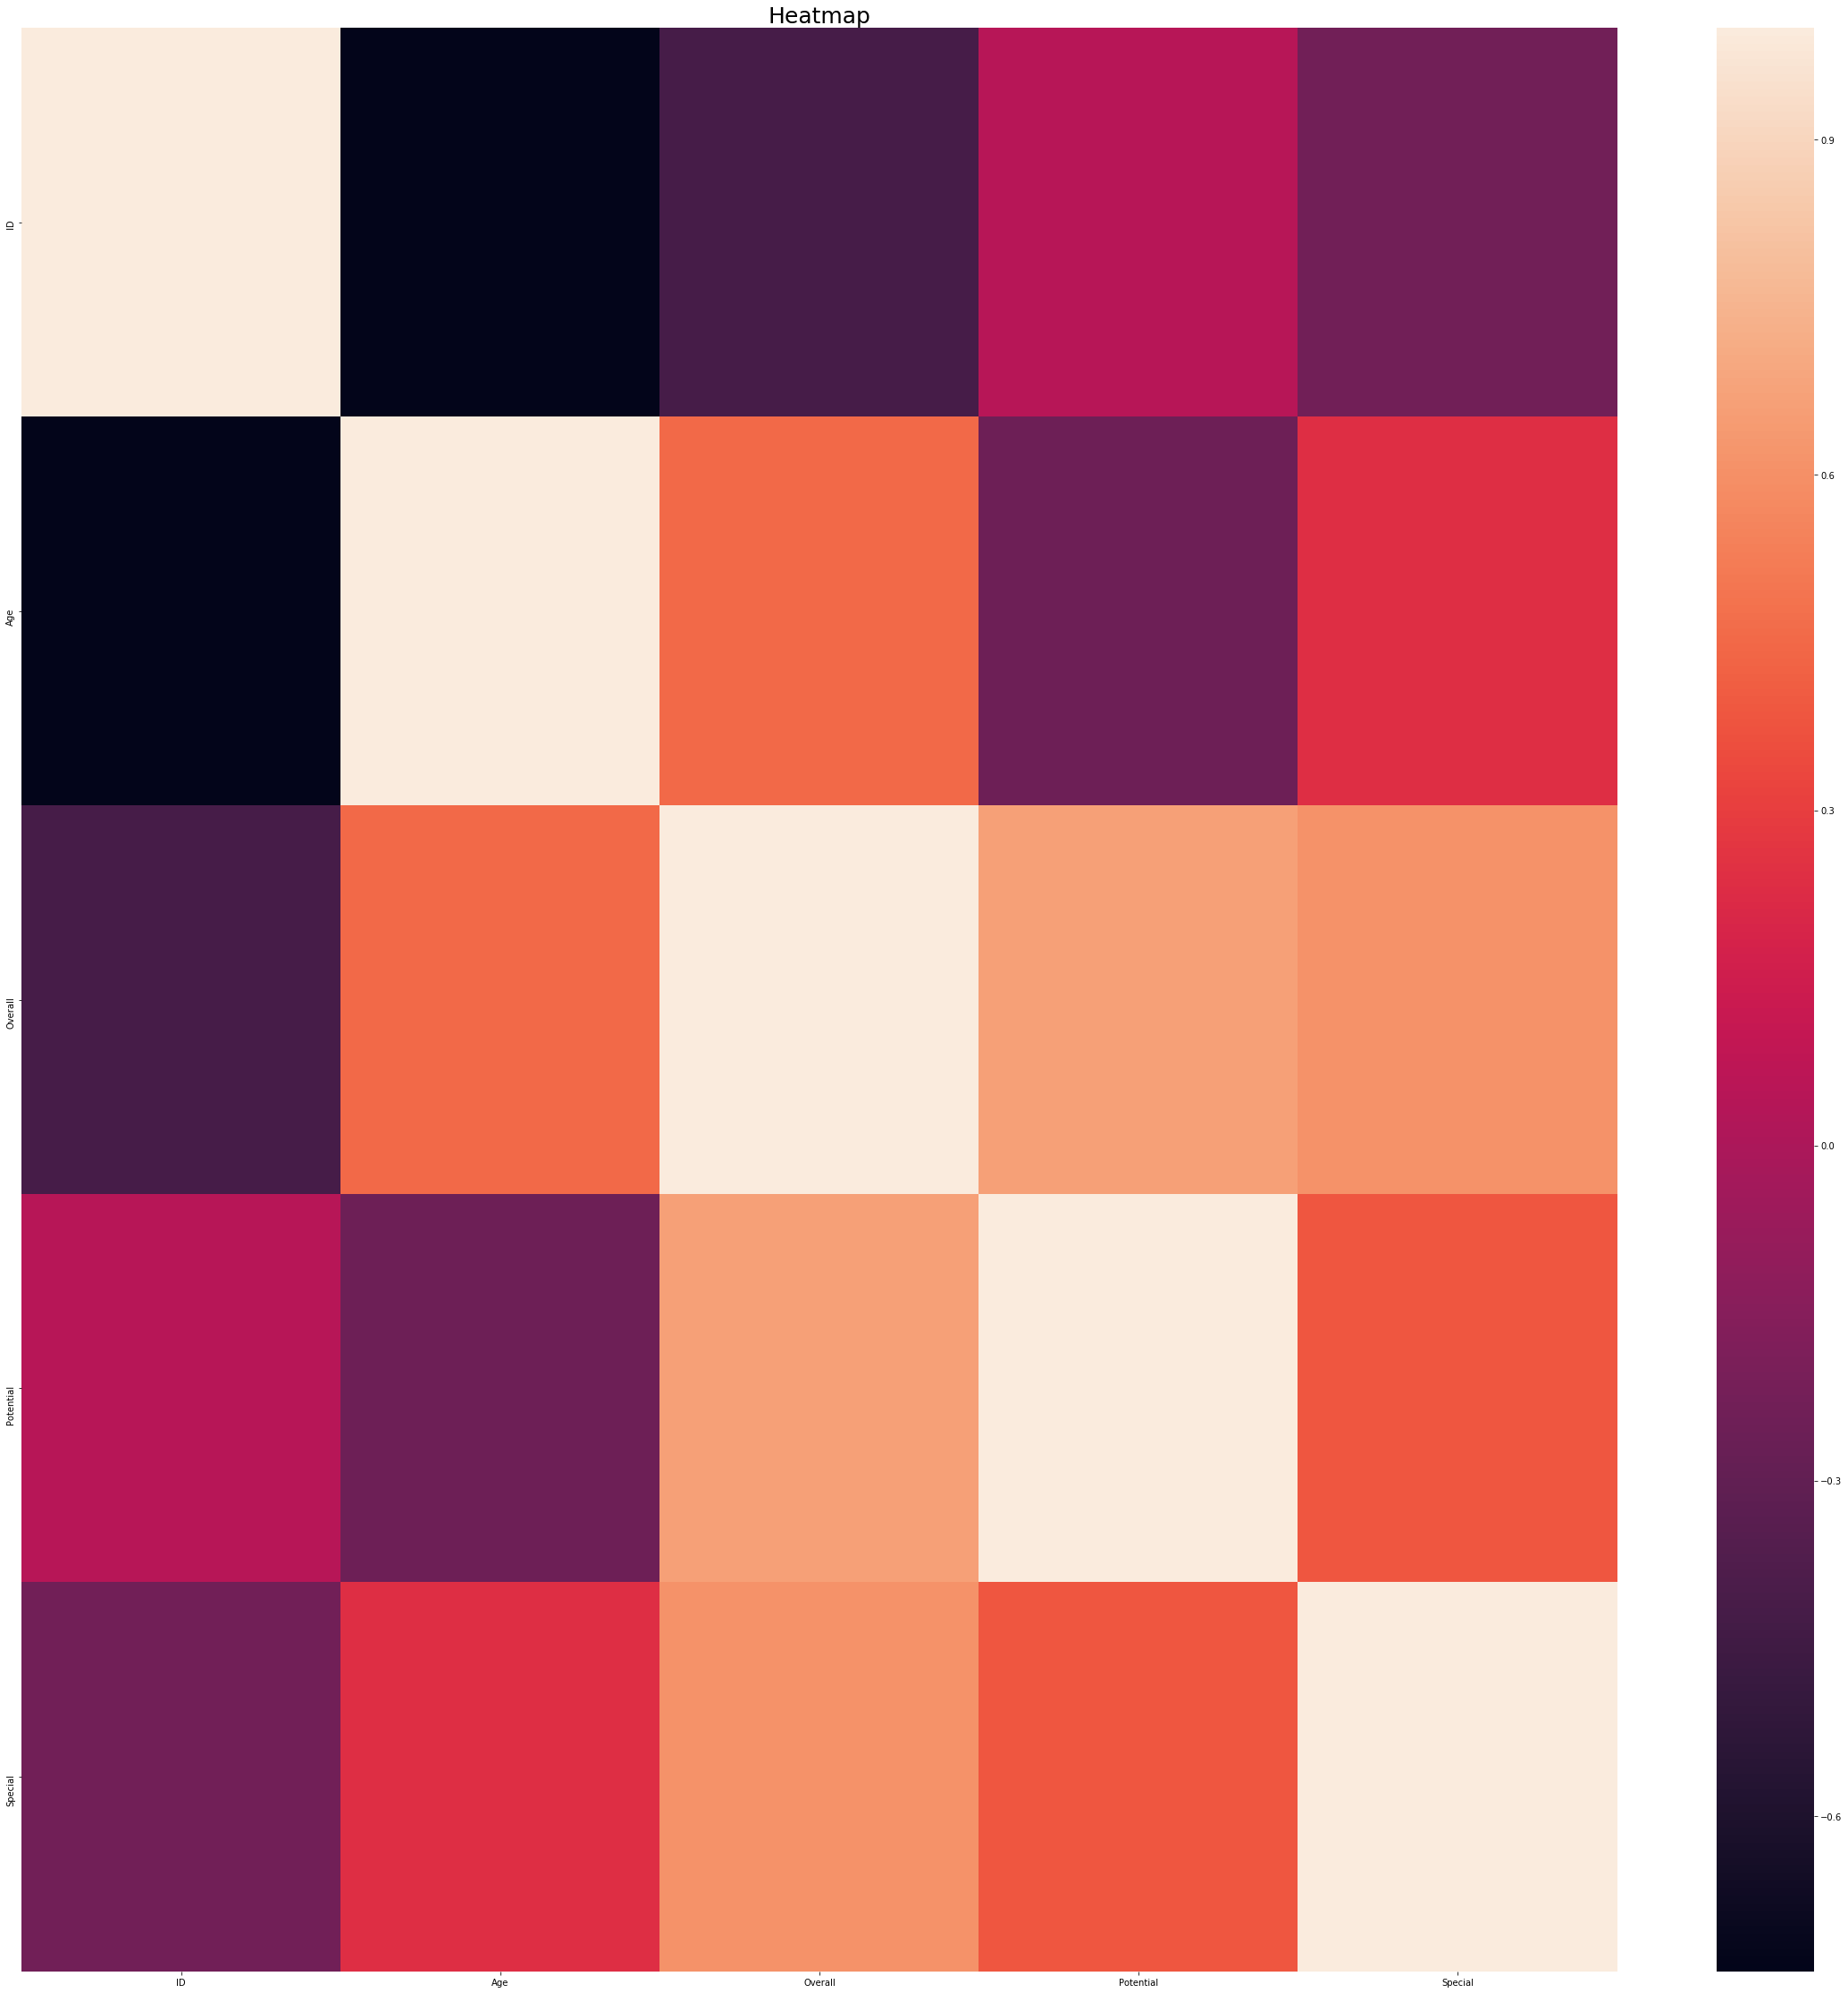

In [10]:
plt.figure(figsize=(40,40))
p = sn.heatmap(fifa_df.corr())
p.set_title(label='Heatmap',fontsize=25)
p


In [11]:
fifa_df.shape

(18207, 86)

In [12]:
#Pickup the top 15 countries with the highest score
fifa_df.sort_values('Overall',ascending=False,inplace=True)
#Which countries have the highest overall scores?
temp_df = fifa_df.drop_duplicates('Nationality')
temp_df.head()


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,75,96,33,28,26,6,11,15,14,8
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,85,95,28,31,23,7,11,15,14,11
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,81,94,27,24,33,9,9,15,15,11
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,40,68,15,21,13,90,85,87,88,94
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,79,88,68,58,51,15,13,5,10,13


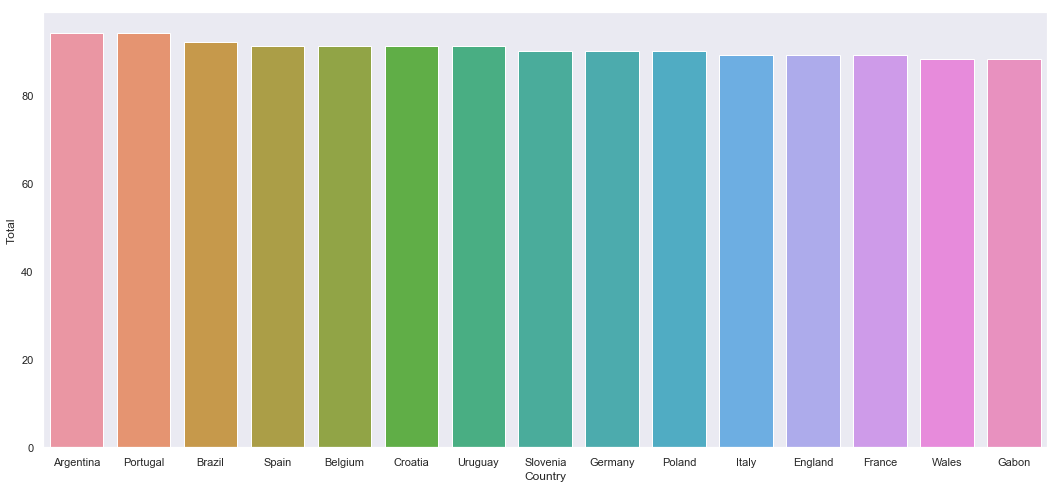

In [14]:
# Let's look at the barplot.

sn.set(style="dark")
plt.figure(figsize=(18,8))
p = sn.barplot(x='Nationality',y='Overall',data=temp_df.head(15))
p.set(xlabel='Country', ylabel='Total')
p

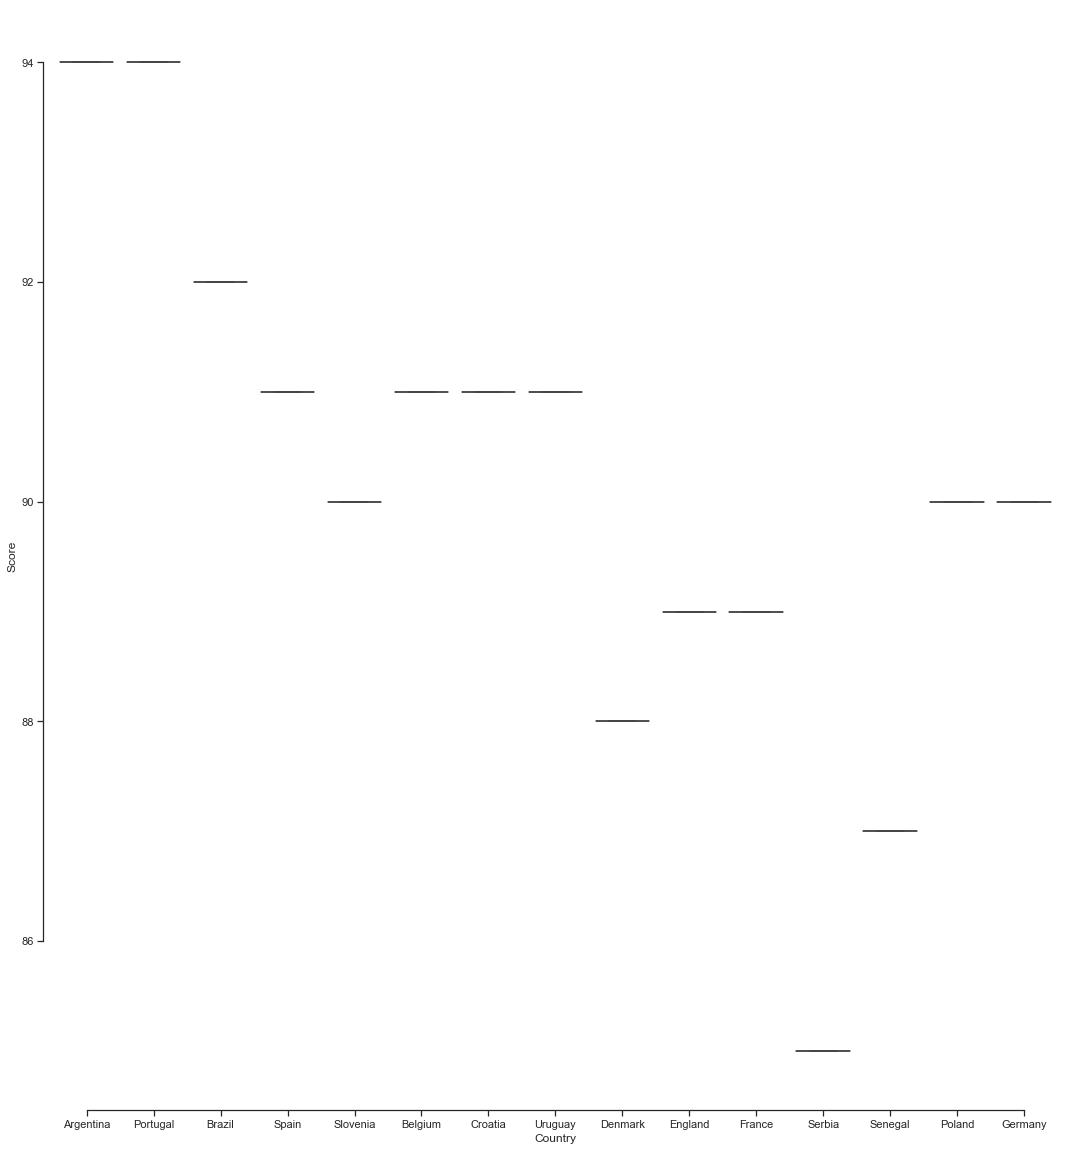

In [35]:
#A better visualization would be boxplot.
sn.set(style="ticks", palette="pastel")

plt.figure(figsize=(18,20))
p=sn.boxplot(x='Nationality',y='Overall',data=temp_df.head(15))
p.set(xlabel='Country',ylabel='Score')
p
sn.despine(offset=10, trim=True)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


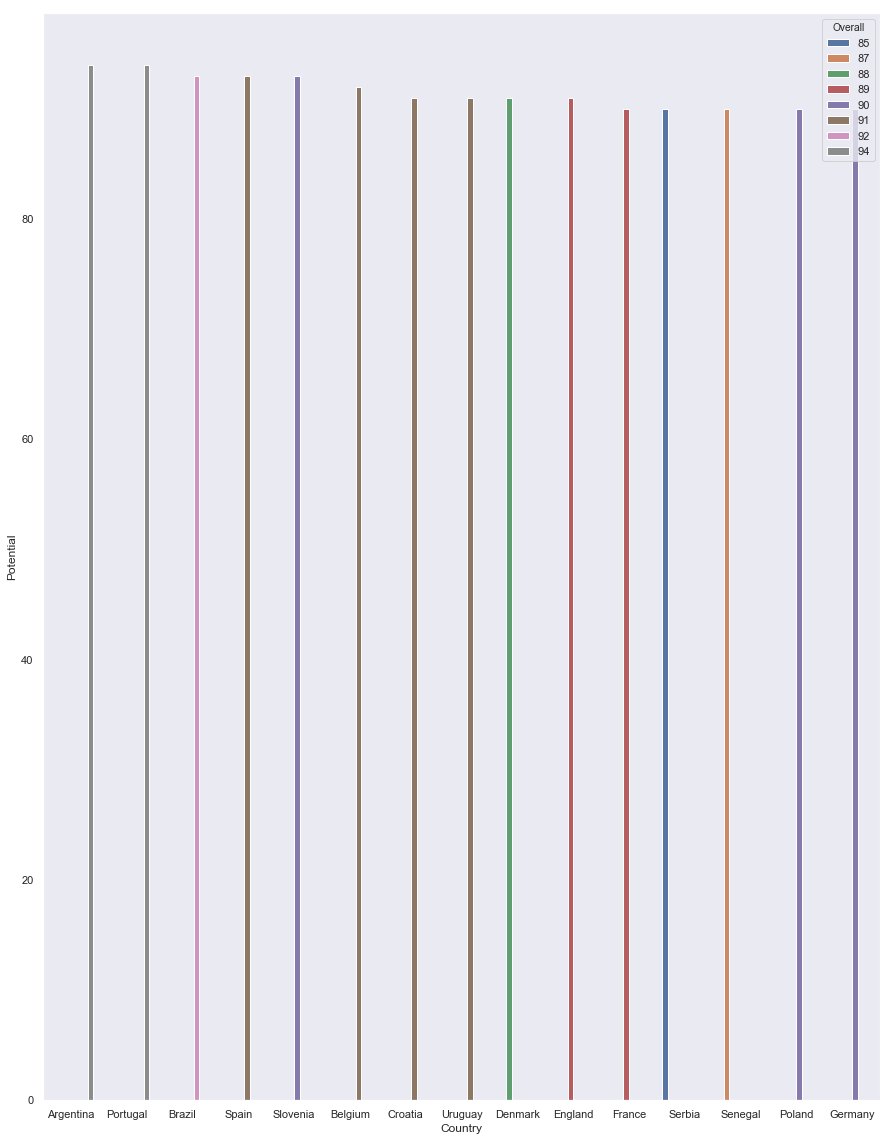

In [22]:
temp_df.sort_values('Potential',ascending=False,inplace=True)

sn.set(style='dark')
plt.figure(figsize=(15,20))
p=sn.barplot(x='Nationality',y='Potential',hue="Overall",data=temp_df.head(15))
p.set(xlabel="Country",ylabel="Potential")
p

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


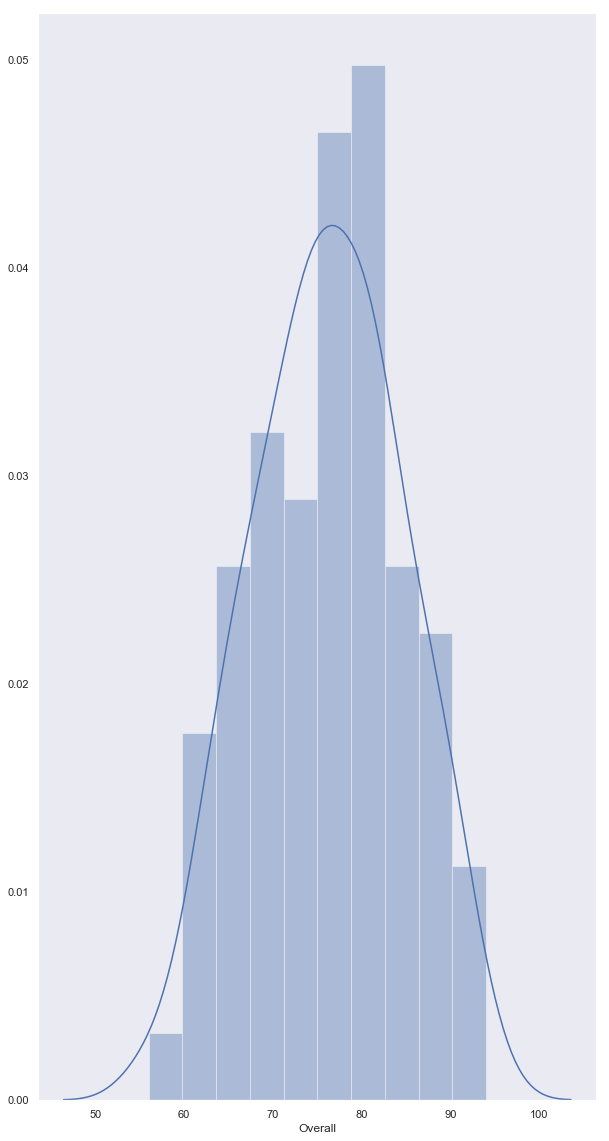

In [23]:
#Lets Check the distribution Oveall carries
plt.figure(figsize=(10,20))
p = sn.distplot(temp_df['Overall'])
p

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


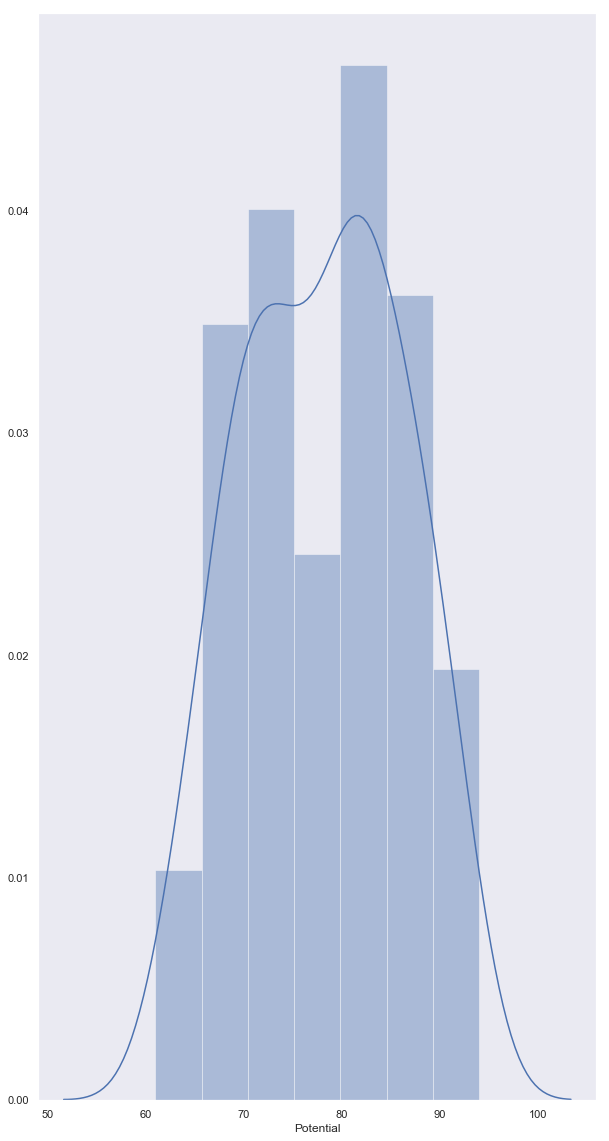

In [24]:
#Lets Check the distribution Oveall carries
plt.figure(figsize=(10,20))
p = sn.distplot(temp_df['Potential'])
p

<Figure size 720x1440 with 0 Axes>

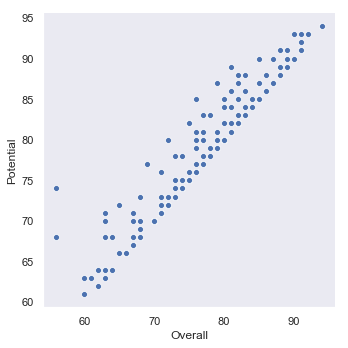

In [25]:
#Lets Check the distribution Oveall carries
plt.figure(figsize=(10,20))
p = sn.relplot(x='Overall',y='Potential',data=temp_df)
p.set(xlabel='Overall',ylabel='Potential')
p

In [26]:

temp_df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandli

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


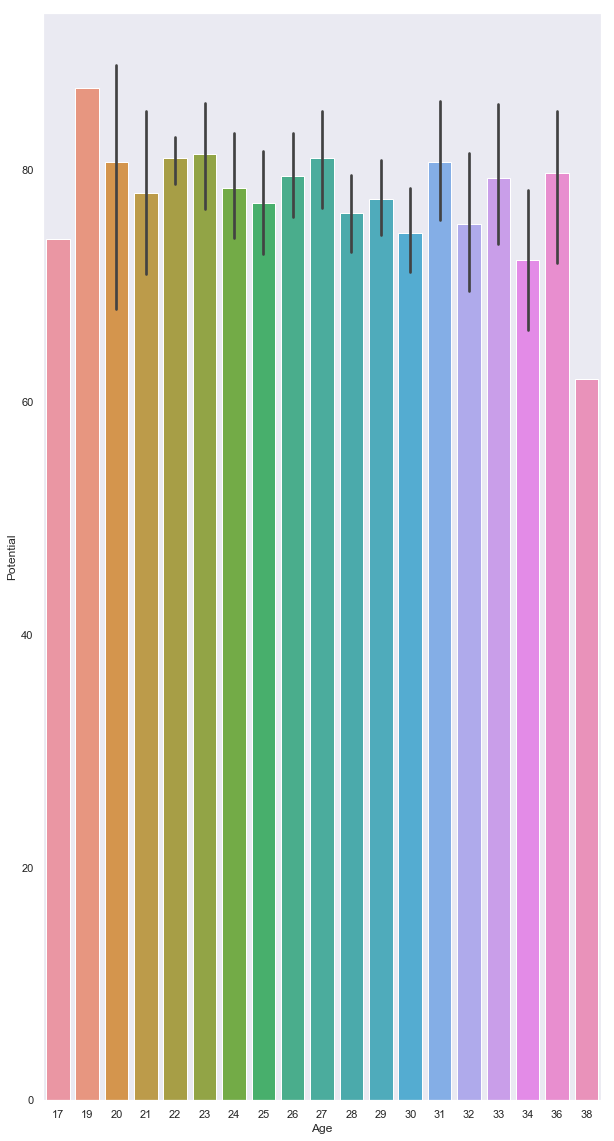

In [29]:
#Lets Check the Age Vs Potential
plt.figure(figsize=(10,20))
p = sn.barplot(x='Age',y='Potential',data=temp_df)
p.set(xlabel='Age',ylabel='Potential')
p

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


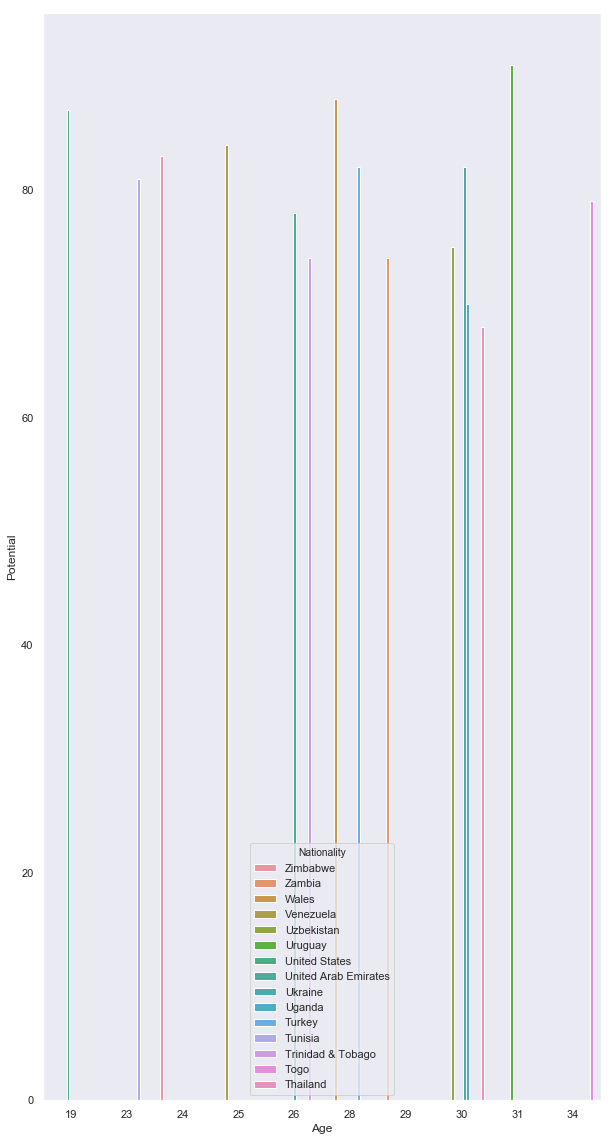

In [111]:
#Lets Check the Age Vs Potential using barplot
temp_df.sort_values('Nationality',ascending=False,inplace=True)
plt.figure(figsize=(10,20))
p = sn.barplot(x='Age',y='Potential',hue='Nationality',data=temp_df.head(15))
p.set(xlabel='Age',ylabel='Potential')
p

In [112]:
temp_df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandli

In [113]:
#Find the age & Country of highest potential player 
temp_df.sort_values('Potential',ascending=False,inplace=True)
print(temp_df.iloc[0]['Age'])
print(temp_df.iloc[0]['Nationality'])

33
Portugal


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x1440 with 0 Axes>

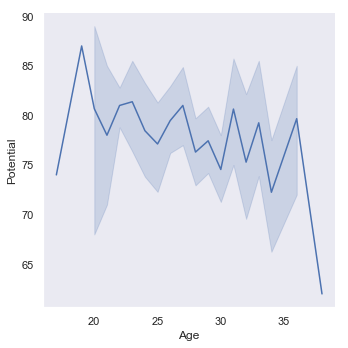

In [114]:
#Lets check the relation between Age and Potential
plt.figure(figsize=(10,20))
p = sn.relplot(x='Age',y='Potential',kind="line",data=temp_df)
p.set(xlabel='Age',ylabel='Potential')
p

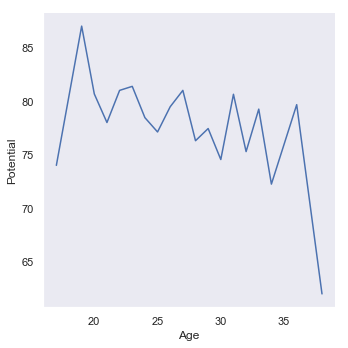

In [115]:
#The Light blue in the above picture shows the area in which values of  age and potential can lie at 95% confidence level. 
#We can even remove this vy setting ci=None
p = sn.relplot(x='Age',y='Potential',kind="line",ci=None,data=temp_df)
p.set(xlabel='Age',ylabel='Potential')
p


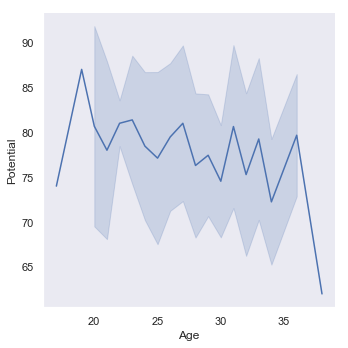

In [116]:
#We can even plot the standard-deviation at each point by ci=sd.
p = sn.relplot(x='Age',y='Potential',kind="line",ci='sd',data=temp_df)
p.set(xlabel='Age',ylabel='Potential')
p

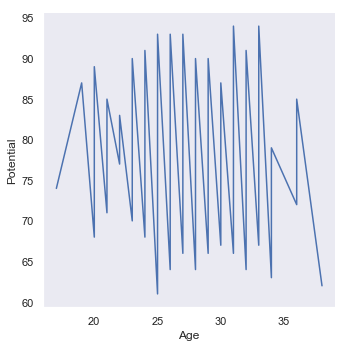

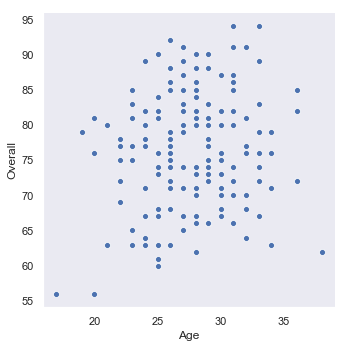

In [144]:
#To turn off aggregation altogether, set the estimator parameter to None 
#This might produce a strange effect when the data have multiple observations at each point.
#Hence doesn't produce a very good observation.

p = sn.relplot(x='Age',y='Potential',kind="line",estimator=None,data=temp_df)
p.set(xlabel='Age',ylabel='Potential')
p

#Also see the relation between Age and Overall
p = sn.relplot(x='Age',y='Overall',data=temp_df)
p.set(xlabel='Age',ylabel='Overall')
p

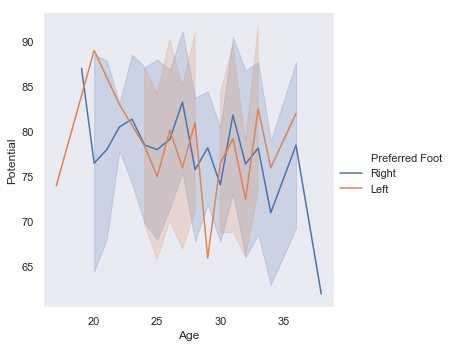

In [118]:
#Now lets try the above graph with a hue value as Preferred Foot
p = sn.relplot(x='Age',y='Potential',kind="line",hue='Preferred Foot',ci='sd',data=temp_df)
p.set(xlabel='Age',ylabel='Potential')
p


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 720x1440 with 0 Axes>

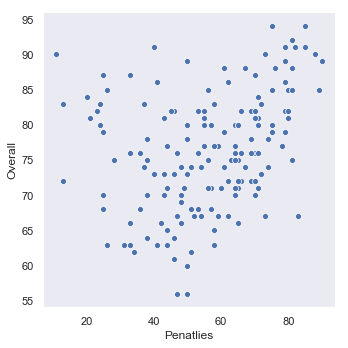

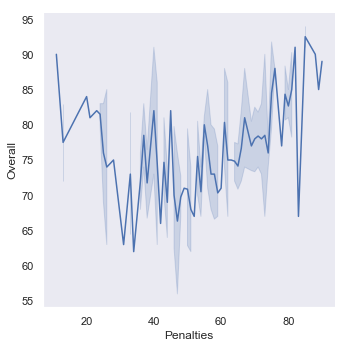

In [119]:
#OK. Now let's plot the graph for Penatlies and Overall
plt.figure(figsize=(10,20))
p = sn.relplot(x='Penalties',y='Overall',data=temp_df)
p.set(xlabel='Penatlies',ylabel='Overall')
p
p = sn.relplot(x='Penalties',y='Overall',kind='line',data=temp_df)
p

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


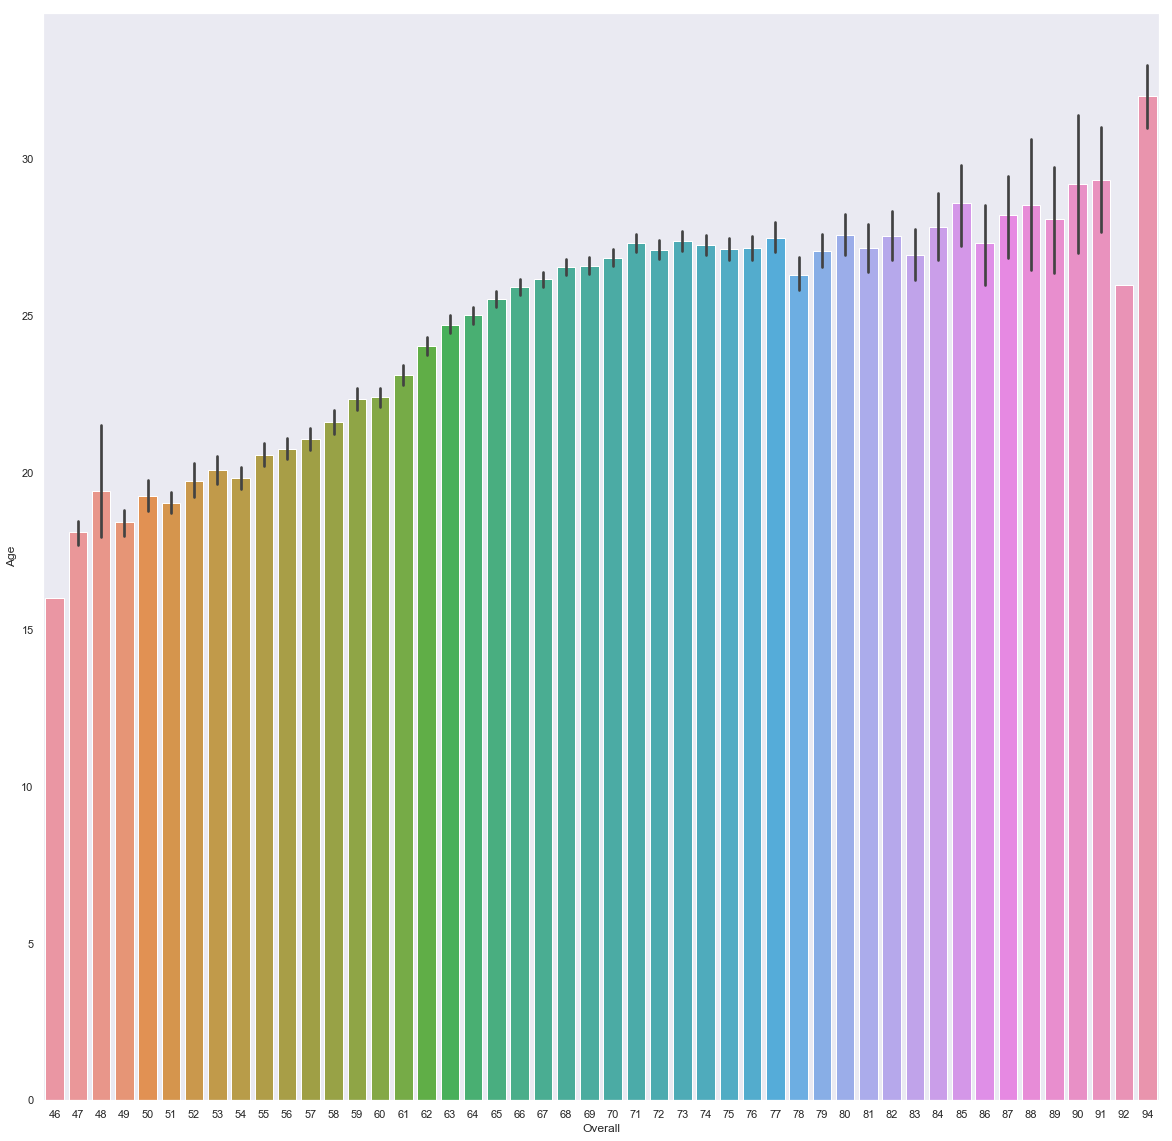

In [30]:
#Lets plot a barplot between Potential and Overall
plt.figure(figsize=(20,20))
p = sn.barplot(x='Overall',y='Age',data=fifa_df)
p.set(xlabel='Overall',ylabel='Age')
p


In [136]:
#Since datatype is not numeric. convert it to numeric
# But should we convert it to numeric or not.
#ALso there are many features like 'Standing' which have a range of 0-maxvalue
#How should we handle these ?

#Doen't look like any relation between penalties and Overall
#Now let's see which are are features that matter to penalties
#['Penalties']
#sn.heatmap(penalties_corr)
penalties_corr = pd.DataFrame(fifa_df.corr())
penalties_corr

,ID,Age,Overall,Potential,Special
ID,1.000000,-0.739208,-0.417025,0.047074,-0.231352
Age,-0.739208,1.000000,0.452350,-0.253312,0.236695
Overall,-0.417025,0.452350,1.000000,0.660939,0.606960
Potential,0.047074,-0.253312,0.660939,1.000000,0.383727
Special,-0.231352,0.236695,0.606960,0.383727,1.000000


In [180]:
#Since we see that lots of columns are missing from the correlation, this means that they are not specified as int/float.
#let's convert some of these features into float values
relevant_features = ['Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure']
#temp_df = fifa_df[relevant_features]

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

In [ ]:
print(fifa_df.columns)
#List the relevant features
relevant_featutes = list(['Age','Reactions', 'Balance','International Reputation', 'Weak Foot','Skill Moves', 'Work Rate', 
                          'Body Type','Finishing', 'HeadingAccuracy','LongShots','BallControl'])


#Since we seeing very less features in the correlation, this would mean that rest of the features are of type Objects
#Lets check which all features are like that

dummy_category = list()
for i in fifa_df.columns:
    if (fifa_df[i].dtype == 'O'):
        if i in relevant_featutes:
            dummy_category.append(i)
            relevant_featutes.remove(i)

for i in relevant_featutes:
    dummy_category.append(i)

for i in relevant_features:
    s= fifa_df[i]
    pd.to_numeric(s)